Goal: Used data scraped from a wikipedia table on NY Times best fiction sellers to find additional best-seller books under the same author.

In [ ]:
#import necessary packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import time

In [ ]:
#Retrieve the html through request
url = "https://en.wikipedia.org/wiki/The_New_York_Times_Fiction_Best_Sellers_of_2020"
page= requests.get(url)

#The html retrieved using the request module above
page.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>The New York Times Fiction Best Sellers of 2020 - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"62827b0c-f84c-4377-adf3-4fc668eb0691","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"The_New_York_Times_Fiction_Best_Sellers_of_2020","wgTitle":"The New York Times Fiction Best Sellers of 2020","wgCurRevisionId":1023147209,"wgRevisionId":1023147209,"wgArticleId":62671993,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["The New York Times Best Seller list","2020 fiction books"

In [ ]:
#Use beautifulsoup to parse the html and .prettify() make html into readable format
soup = BeautifulSoup (page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   The New York Times Fiction Best Sellers of 2020 - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"62827b0c-f84c-4377-adf3-4fc668eb0691","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"The_New_York_Times_Fiction_Best_Sellers_of_2020","wgTitle":"The New York Times Fiction Best Sellers of 2020","wgCurRevisionId":1023147209,"wgRevisionId":1023147209,"wgArticleId":62671993,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["The New York Times Best Seller list","2020 fic

In [ ]:
#There is only 1 table on the wikipedia 
#The table that we want has a class of 'wikitable sortable'
#use .find() to find it
table = soup.find ('table', class_= 'wikitable sortable')
table

<table class="wikitable sortable" style="text-align: center">
<tbody><tr>
<th>Date
</th>
<th>Book
</th>
<th>Author
</th></tr>
<tr>
<td>January 5
</td>
<td rowspan="5"><i><a href="/wiki/Where_the_Crawdads_Sing" title="Where the Crawdads Sing">Where the Crawdads Sing</a></i>
</td>
<td rowspan="5"><a href="/wiki/Delia_Owens" title="Delia Owens">Delia Owens</a>
</td></tr>
<tr>
<td>January 12
</td></tr>
<tr>
<td>January 19
</td></tr>
<tr>
<td>January 26
</td></tr>
<tr>
<td>February 2
</td></tr>
<tr>
<td>February 9
</td>
<td rowspan="2"><i><a href="/wiki/American_Dirt" title="American Dirt">American Dirt</a></i>
</td>
<td rowspan="2"><a href="/wiki/Jeanine_Cummins" title="Jeanine Cummins">Jeanine Cummins</a>
</td></tr>
<tr>
<td>February 16
</td></tr>
<tr>
<td>February 23
</td>
<td rowspan="1"><i><a href="/wiki/In_Death" title="In Death">Golden in Death</a></i>
</td>
<td rowspan="1"><a href="/wiki/Nora_Roberts" title="Nora Roberts">J.D. Robb</a>
</td></tr>
<tr>
<td>March 1
</td>
<td rowspan="

In [ ]:
#Creating lists for columns in the table 
dates = []
titles = []
authors = []

#For each table row, we want to run through each table data and get the text
for row in table.findAll('tr'):  
  cells = row.findAll('td')     
  if(len(cells) == 3):  #If the length of the table data is 3, because there exists 3 columns
    #Use .find(text=True) to extract and append text  
    dates.append(cells[0].find(text=True).rstrip("\n"))
    titles.append(cells[1].find(text=True).rstrip("\n"))
    authors.append(cells[2].find(text=True).rstrip("\n"))  


In [ ]:
#Creating a dataframe for the 3 lists
dic= {'dates':dates,
          'titles': titles,
          'authors': authors,
  }
      
DF1= pd.DataFrame(dic)
DF1

,dates,titles,authors
0,January 5,Where the Crawdads Sing,Delia Owens
1,February 9,American Dirt,Jeanine Cummins
2,February 23,Golden in Death,J.D. Robb
3,March 1,American Dirt,Jeanine Cummins
4,March 8,One Minute Out,Mark Greaney
5,March 15,Blindside,James Patterson
6,March 22,House of Earth and Blood,Sarah J. Maas
7,March 29,The Mirror and the Light,Hilary Mantel
8,April 5,The Boy from the Woods,Harlan Coben
9,April 12,Little Fires Everywhere,Celeste Ng


In [ ]:
#Creating new author's list with no repetition of author's name so we can request api for them only once
author_list = []
#Used list comprehension
[author_list.append(x) for x in authors if x not in author_list]
author_list

['Delia Owens',
 'Jeanine Cummins',
 'J.D. Robb',
 ' Mark Greaney',
 'James Patterson',
 'Sarah J. Maas',
 'Hilary Mantel',
 'Harlan Coben',
 'Celeste Ng',
 'John Sandford',
 'David Baldacci',
 'John Grisham',
 'James Patterson and ',
 'Nora Roberts',
 'Brit Bennett',
 'Elin Hilderbrand',
 'Daniel Silva',
 'Brad Thor',
 'Catherine Coulter',
 'Danielle Steel',
 'Sandra Brown',
 'Louise Penny',
 ' J.D. Robb',
 'Ken Follett',
 'Jodi Picoult',
 'Nicholas Sparks',
 'Lee Child',
 'Janet Evanovich',
 'Michael Connelly',
 'Brandon Sanderson',
 'Ernest Cline']

In [ ]:
#Authenication key
key= 'Uc8DQPyeVrwQHWcKPQweZPAi1QtZ5VBh'

In [ ]:
#request function to request all the authors
def request (author_list):
    urls = f"https://api.nytimes.com/svc/books/v3/reviews.json?author={author}&api-key=" + key
    r = requests.get(urls)

    #request is successful
    if (r.status_code == 200):
      data = r.json()
      print(json.dumps(data, sort_keys=True, indent= 2))
      return data
    # Too many requests at once, set timer to sleep and then recursion to run through rest of request  
    elif (r.status_code== 429):
      time.sleep(0.25)
      return request(format)
    #Request is unsuccessful
    else:
      print(format)


In [ ]:
#Function to parse and append wanted data into list
def list(data):
  book_authors=[]
  book_titles=[]
  isbn13=[]
  publication_dates=[]
  urls=[]

  #For loop to run through all data and append the needed data to the appropriate list above
  for i in range (0, len(data['results'])):
    book_titles.append(data['results'][i]['book_title'])
    book_authors.append(data['results'][i]['book_author'])
    isbn13.append(data['results'][i]['isbn13'][0]) #Only want the 1st ibsn13 since there are multiple
    publication_dates.append(data['results'][i]['publication_dt']) 
    urls.append(data['results'][i]['url'])

  return book_authors, book_titles, isbn13, publication_dates, urls

In [ ]:
#Function to create dataframe of the lists above
def dataframe(book_authors, book_titles, isbn13, publication_dates, urls):
  
  books= {'authors':book_authors,
          'titles': book_titles,
          'isbn13': isbn13,
          'publication dates': publication_dates,
          'urls': urls,
  }

  DF2= pd.DataFrame(books)
  return DF2

In [ ]:
DF2 = []

#for loop to pass all authors and their results through each function above
for author in authors:
  r = request(author_list)
  book_authors, book_titles, isbn13, publication_dates, urls = list(r)
  df= dataframe(book_authors, book_titles, isbn13, publication_dates, urls)
  #append dataframe result to a list
  DF2.append(df)

{
  "copyright": "Copyright (c) 2021 The New York Times Company.  All Rights Reserved.",
  "num_results": 0,
  "results": [],
  "status": "OK"
}
{
  "copyright": "Copyright (c) 2021 The New York Times Company.  All Rights Reserved.",
  "num_results": 3,
  "results": [
    {
      "book_author": "Jeanine Cummins",
      "book_title": "American Dirt",
      "byline": "PARUL SEHGAL",
      "isbn13": [
        "9781250209764"
      ],
      "publication_dt": "2020-01-17",
      "summary": "Jeanine Cummins\u2019s much-anticipated novel \u201cAmerican Dirt,\u201d about Mexican migrants crossing to America, is well intentioned. Is that enough?",
      "uri": "nyt://book/00000000-0000-0000-0000-000000000000",
      "url": "https://www.nytimes.com/2020/01/17/books/review-american-dirt-jeanine-cummins.html",
      "uuid": "00000000-0000-0000-0000-000000000000"
    },
    {
      "book_author": "Jeanine Cummins",
      "book_title": "American Dirt",
      "byline": "LAUREN GROFF",
      "isbn13":

In [ ]:
#Concat all the authors dataframe together
DF2= pd.concat(DF2, ignore_index=True)
# There were some duplicates from the api (same author, title, isbn13, publication date, and url)
# We drop those duplicates, only want unique returns
DF2.drop_duplicates(subset='isbn13', inplace=True)
DF2

,authors,titles,isbn13,publication dates,urls
0,Jeanine Cummins,American Dirt,9781250209764,2020-01-17,https://www.nytimes.com/2020/01/17/books/revie...
6,James Patterson,Thriller,9781439552285,2006-12-03,http://www.nytimes.com/2006/12/03/books/review...
7,James Patterson,Suzanne's Diary for Nicholas,9780316969444,2001-07-24,http://www.nytimes.com/2001/07/24/books/books-...
8,James Patterson,Violets Are Blue ~ Detective Alex Cross Series,9780316693233,2001-11-29,http://www.nytimes.com/2001/11/29/books/books-...
9,James Patterson,Four Blind Mice (Alex Cross),9780316693004,2002-11-21,http://www.nytimes.com/2002/11/21/books/books-...
10,james patterson,(First Edition) the Big Bad Wolf Hardcover by ...,9780316602907,2003-12-01,http://www.nytimes.com/2003/12/01/books/books-...
11,Hilary Mantel,Beyond Black,9780312426057,2005-05-15,http://www.nytimes.com/2005/05/15/books/review...
12,Hilary Mantel,Giving up the Ghost : A Memoir,9780805074727,2003-10-05,http://www.nytimes.com/2003/10/05/books/unsuit...
13,Hilary Mantel,Beyond Black,9780805073560,2006-05-21,http://query.nytimes.com/gst/fullpage.html?res...
14,Hilary Mantel,Bring Up the Bodies,9780007315109,2012-05-02,http://www.nytimes.com/2012/05/02/books/bring-...


In [ ]:
#View all rows
pd.set_option('display.max_rows', None)
#Merge the wikipedia parsed table dataframe and the API data dataframe into 1 dataframe based on the same author 
#Merge based on the wikipedia table using same author names
DF3= pd.merge (DF1, DF2, on='authors', how= 'left')
DF3.rename (columns = {"titles_x": "top fiction best-sellers titles from wikipedia", "titles_y":"Best-sellers from author (api)"}, inplace=True)
DF3

,dates,top fiction best-sellers titles from wikipedia,authors,Best-sellers from author (api),isbn13,publication dates,urls
0,January 5,Where the Crawdads Sing,Delia Owens,NaN,NaN,NaN,NaN
1,February 9,American Dirt,Jeanine Cummins,American Dirt,9781250209764,2020-01-17,https://www.nytimes.com/2020/01/17/books/revie...
2,February 23,Golden in Death,J.D. Robb,NaN,NaN,NaN,NaN
3,March 1,American Dirt,Jeanine Cummins,American Dirt,9781250209764,2020-01-17,https://www.nytimes.com/2020/01/17/books/revie...
4,March 8,One Minute Out,Mark Greaney,NaN,NaN,NaN,NaN
5,March 15,Blindside,James Patterson,Thriller,9781439552285,2006-12-03,http://www.nytimes.com/2006/12/03/books/review...
6,March 15,Blindside,James Patterson,Suzanne's Diary for Nicholas,9780316969444,2001-07-24,http://www.nytimes.com/2001/07/24/books/books-...
7,March 15,Blindside,James Patterson,Violets Are Blue ~ Detective Alex Cross Series,9780316693233,2001-11-29,http://www.nytimes.com/2001/11/29/books/books-...
8,March 15,Blindside,James Patterson,Four Blind Mice (Alex Cross),9780316693004,2002-11-21,http://www.nytimes.com/2002/11/21/books/books-...
9,March 22,House of Earth and Blood,Sarah J. Maas,NaN,NaN,NaN,NaN


The NaN values are kept in this case because it shows readers of my code that a particular author has no other best-seller books based on NY Times, so there will be no recommedations. Some of the rows (same author & title & additional titles) repeat because the dates on the list differ according to when it was a best-seller.

In [ ]:
#Use .describe() to show summary statistics
#No numerical columns so categorical descriptions
#Top shows the author with the most additional book best-sellers
DF3.describe()

,dates,top fiction best-sellers titles from wikipedia,authors,Best-sellers from author (api),isbn13,publication dates,urls
count,169,169,169,154,154,154,154
unique,38,34,31,99,105,104,103
top,May 31,Camino Winds,John Grisham,The Appeal,9780375431012,1996-05-23,http://www.nytimes.com/2001/03/04/books/no-law...
freq,23,46,69,6,3,3,3


In [ ]:
#Goal: Creating a bar graph of the number of authors' other best-sellers 
list1=[]
list2=[]
for x in author_list:
  # if author is found in DF2 (dataframe with all the additional best-sellers from the authors in the wikipedia)
  # then append the author's name to a list & get all the numerical values into a list 
  #I sorted the index (author's name by alphabetical order so the number will correspond to the correct author's name in list1)
  if x in DF2.values:
    list1.append(x)
    values=DF2['authors'].value_counts().sort_index(ascending=True).to_list()
  #If authors name do not appear in the additional best-sellers list, it means they only had 1 best-seller (as show in the DF1 dataframe)
  else:
    list2.append(x)

#Want to sort the names in the list because it will correspond to the correct sorted numbers (values) 
sorted_lists=sorted(list1)+sorted(list2)


In [ ]:
#creating a dataframe of the sorted author's name and their respective values
final_df= pd.DataFrame([sorted_lists, values])
#Had to transpose the dataframe (columns and rows were transposed)
final_df= final_df.T
#Those authors who did not appear in the additional best-sellers list, give them a value of 0
final_df=final_df.fillna(0)
#Rename the columns
final_df.rename(columns={0: "Author", 1: "# of NY Times Best-Sellers Books"}, inplace=True)
final_df

,Author,# of NY Times Best-Sellers Books
0,Brandon Sanderson,1
1,Brit Bennett,2
2,Celeste Ng,2
3,Daniel Silva,2
4,Danielle Steel,6
5,Ernest Cline,1
6,Harlan Coben,3
7,Hilary Mantel,12
8,James Patterson,4
9,Janet Evanovich,2


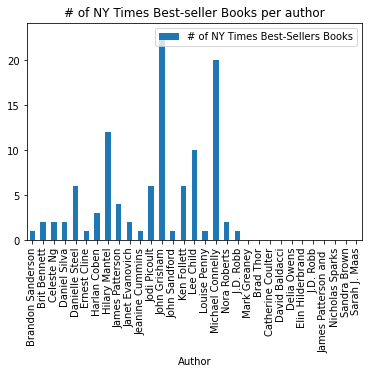

In [ ]:
#Making a bar chart of the # of additional NY Times Best-seller books per author
bar_chart= final_df.plot(x='Author', y='# of NY Times Best-Sellers Books', title='# of NY Times Best-seller Books per author', kind='bar') 

In [ ]:
#Export to csv file
DF3.to_csv('NYTimesFictionBestSellers.csv')